# Pymaceuticals Inc.
---

### Analysis

- The total number of mice, after removing duplicates, is 248. The bar graph indicates that Capomulin has the highest count with 230 mice, while Propriva has the lowest count with 161 mice.
  
- The distribution of male verses female mice shows a higher number of males. However, the percentage differance between the sexes may not significantly impact the study's results.

  
- Mouse ID u364 was treated with Capomulin. Initially, at timepoint 0, the tumor volume was 45.00 mm³ with no metastatic sites. Over the course of 45 days, there was a notable fluctuation in tumor volume. It increased slightly in the first 15 days, peaking at 47.21 mm³ at day 15. However, from day 20 onwards, the tumor volume began to decrease significantly, reaching 31.02 mm³ by day 45. This suggests that Capomulin had a delayed but ultimately substantial effect in reducing the tumor size in this mouse. Concurrently, the number of metastatic sites increased from 0 at the start to 3 by the end of the observation period, indicating that while the primary tumor size decreased, the spread of the disease to other areas still occurred. This dual observation highlights the complex nature of cancer treatment, where reductions in primary tumor size do not always correspond to reductions in metastasis.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
join_data = pd.merge(study_results, mouse_metadata, how= 'left', on='Mouse ID')


# Display the data table for preview
join_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice.
mice_count = len(join_data["Mouse ID"].unique())
mice_count

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = join_data.loc[join_data.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
duplicated_mice


array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = join_data[join_data["Mouse ID"].isin(duplicated_mice)==False]
clean_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_data["Mouse ID"].unique())
mice_count

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Mean Tumor Volume":mean,
                            "Mean Tumor Volume":median,
                            "Tumor Volume Variance":var,
                            "Tumor Volume Std Dev":std,
                            "Tumor Volume Std Err":sem})
summary_stat


,Mean Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,
Capomulin,41.557809,24.947764,4.994774,0.329346
Ceftamin,51.776157,39.290177,6.268188,0.469821
Infubinol,51.820584,43.128684,6.567243,0.492236
Ketapril,53.698743,68.553577,8.279709,0.603860
Naftisol,52.509285,66.173479,8.134708,0.596466
Placebo,52.288934,61.168083,7.821003,0.581331
Propriva,50.446266,43.852013,6.622085,0.544332
Ramicane,40.673236,23.486704,4.846308,0.320955
Stelasyn,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# And SEM of the tumor volume for each regimen (only one method os required in the solution)

# Using the aggreagated method, produced the samr summary statistics in a single line
summary_aggregate = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count_drug = join_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_count_drug


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

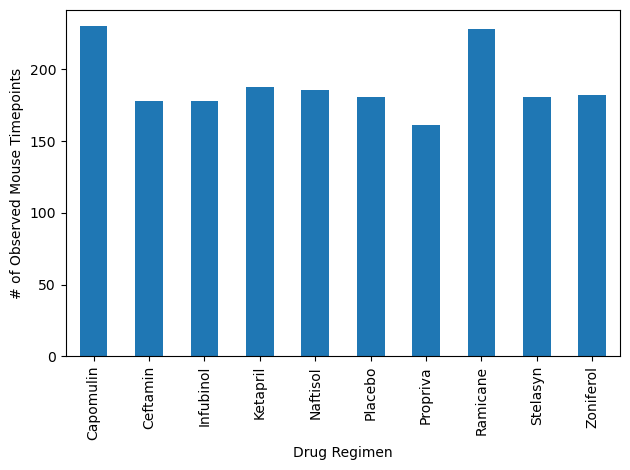

In [18]:
# Bar Plot using Pandas
pandas_plot = mice_count_drug.plot.bar()

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()

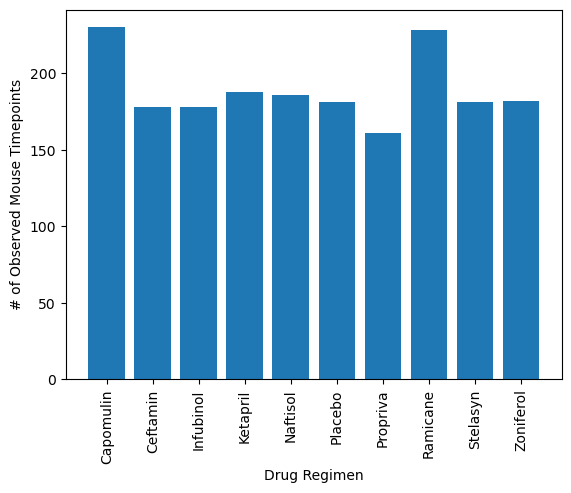

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis_regimen = np.arange(len(mice_count_drug))
regimen_name = list(mice_count_drug.index.values)

py_bar_mice_per_regimen = plt.bar(x_axis_regimen, mice_count_drug)
plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.xlabel("Drug Regimen")  
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

plt.close()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice= join_data.groupby('Sex')['Sex'].count()
sex_mice


Sex
Female    935
Male      958
Name: Sex, dtype: int64

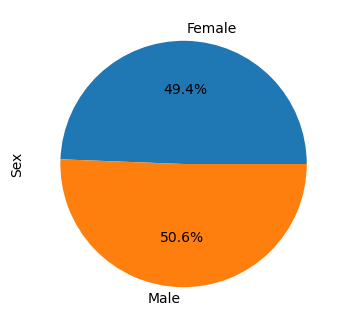

In [21]:
pd_sex_mice=sex_mice.plot(labels=["Female", "Male"], kind = "pie", y = "Sex", autopct = "%1.1f%%", figsize=(4,4))

##### Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_data.groupby("Mouse ID")
greatest_timepoint=greatest_timepoint["Timepoint"].max()
greatest_timepoint_df=pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_tumor=pd.merge(greatest_timepoint_df, clean_data, on = ["Mouse ID", "Timepoint"])
volume_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [34]:
# List of treatments
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = volume_tumor.loc[volume_tumor['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add subset to the list
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate IQR & Quantitatively
    quartile = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5 * iqr)
    up_bound = upper + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol > up_bound) | (final_tumor_vol < low_bound)]
    
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")

# You can now use `final_tumor_vol_list` for further analysis or plotting

The outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.


<function matplotlib.pyplot.show(close=None, block=None)>

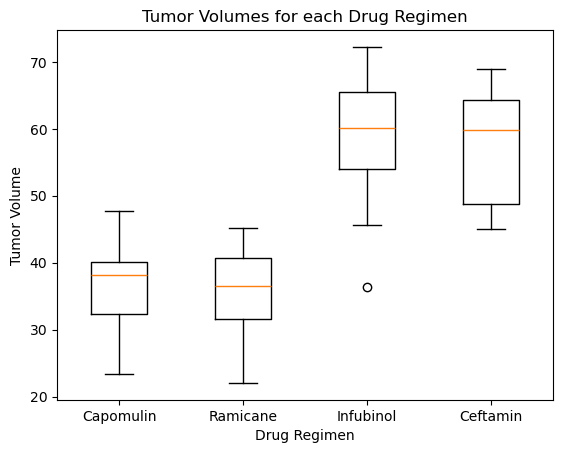

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_vol_list, labels = regimen)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show

## Line and Scatter Plots

In [38]:
# Mice treated with Capomulin
campomulin_regimen = clean_data.loc[clean_data["Drug Regimen"] =="Capomulin"]
campomulin_regimen = clean_data.reset_index()
campomulin_regimen 

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,f932,0,45.000000,0,Ketapril,Male,15,29
2,2,g107,0,45.000000,0,Ketapril,Female,2,29
3,3,a457,0,45.000000,0,Ketapril,Female,11,30
4,4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...
1875,1888,r944,45,41.581521,2,Capomulin,Male,12,25
1876,1889,u364,45,31.023923,3,Capomulin,Male,18,17
1877,1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,1891,x773,45,58.634971,4,Placebo,Female,21,30


In [42]:
# A single mouse
campomulin_mouse = campomulin_regimen.loc[campomulin_regimen['Mouse ID'] == 'u364']
campomulin_mouse

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
232,234,u364,0,45.000000,0,Capomulin,Male,18,17
322,324,u364,5,45.760886,1,Capomulin,Male,18,17
509,513,u364,10,46.568417,2,Capomulin,Male,18,17
855,862,u364,15,47.212200,2,Capomulin,Male,18,17
910,918,u364,20,40.343948,2,Capomulin,Male,18,17
1195,1206,u364,25,35.503616,2,Capomulin,Male,18,17
1299,1310,u364,30,35.978334,2,Capomulin,Male,18,17
1553,1565,u364,35,35.459490,2,Capomulin,Male,18,17
1691,1704,u364,40,36.024138,2,Capomulin,Male,18,17
1876,1889,u364,45,31.023923,3,Capomulin,Male,18,17


Text(0, 0.5, 'Tumor Volume')

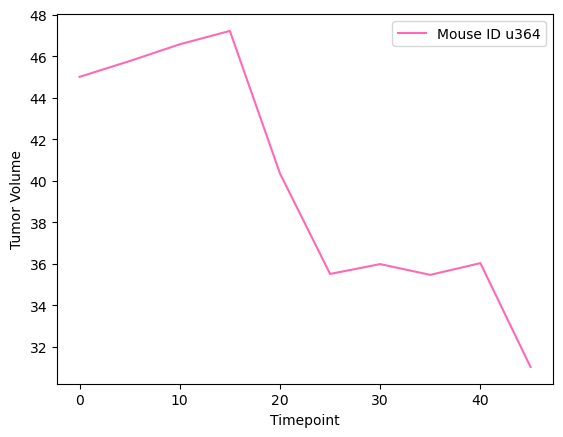

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_u364 = campomulin_mouse.loc[campomulin_mouse["Mouse ID"]=="u364"]

# Line Plot creation
x = Mouse_u364["Timepoint"]
y = Mouse_u364 ["Tumor Volume (mm3)"]

plt.plot(x, y, color="hotpink", label="Mouse ID u364")
plt.legend(loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")


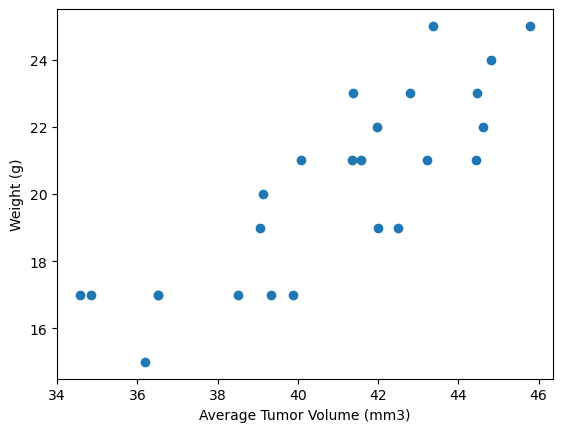

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_plot=clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
capomulin_avg_tumor=capomulin_plot["Tumor Volume (mm3)"].mean()
mouse_weight=capomulin_plot["Weight (g)"].unique()
plt.scatter(capomulin_avg_tumor, mouse_weight)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

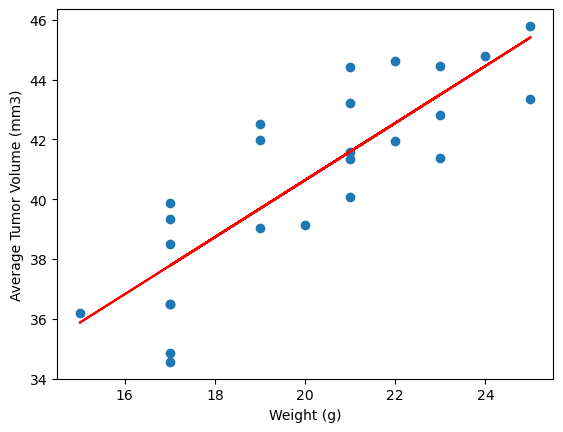

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

correlation = st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
line_equation = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*line_equation[0]+line_equation[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()